# Activity: Hypothesis testing with Python

## **Introduction**


As you've been learning, analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting. 

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **Step 1: Imports** 


Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [6]:
# Import libraries and packages.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set_theme(style='whitegrid')

from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA.

data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

**Question:** Why is it useful to perform exploratory data analysis before constructing a linear regression model?

**Answer:** 

We need to conduct EDA before constructing a linear regression model for several reasons:
- **Identify outliers:** Outliers are data points that are significantly different from the rest of the data. Outliers can skew the results of a linear regression model, so it is important to identify and remove them before fitting the model.
- **Check for multicollinearity:** Multicollinearity occurs when two or more independent variables are highly correlated. Multicollinearity can make it difficult to estimate the coefficients of a linear regression model, so it is important to check for it before fitting the model.
- **To clean the dataset and transform data if necessary to the correct form for the model.** This might involve removing missing values, imputing missing values, or transforming variables to a different scale.

- **Choose the correct model:** There are many different types of linear regression models, each with its own strengths and weaknesses. The best model for a particular dataset will depend on the specific goals of the analysis. EDA can help us choose the correct model by providing insights into the data and the relationships between the variables.

## **Step 2: Data exploration** 


First, use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

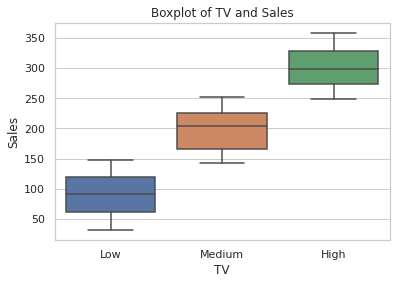

In [8]:
# Create a boxplot with TV and Sales.

sns.boxplot(x=data['TV'], y=data['Sales'])
plt.title('Boxplot of TV and Sales');

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a function in the `seaborn` library that creates a boxplot showing the distribution of a variable across multiple groups.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `boxplot()` function from `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `TV` as the `x` argument, `Sales` as the `y` argument, and `data` as the `data` argument.

</details>

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

**Answer:**

Yes, there is a clear positive correlation between `TV` promotion budget and `Sales`. As the `TV` promotion budget increases, `Sales` tend to increase as well. This is likely because TV advertising is a very effective way to reach a large audience and generate awareness for a product or service but the significance of these differences can be tested with a one-way ANOVA.


Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

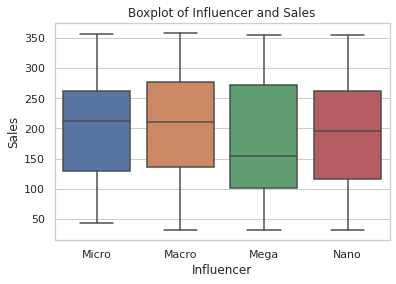

In [9]:
# Create a boxplot with Influencer and Sales.

sns.boxplot(x=data['Influencer'], y=data['Sales'])
plt.title('Boxplot of Influencer and Sales');

**Question:** Is there variation in `Sales` based off the `Influencer` size?

**Answer:**

There is some variation in `Sales` across the `Influencer` size groups, but it may not be significant. The four boxplots show that the minimum, maximum, and interquartile range (IQR) are roughly similar for all four groups. This suggests that the variation in `Sales` is not very large across 4 size category of `Influencer`.

### Remove missing data

You may recall from prior labs that this dataset contains rows with missing values. To correct this, drop these rows. Then, confirm the data contains no missing values.

In [27]:
# Drop rows that contain missing data and update the DataFrame.

data = data.dropna()

# Confirm the data contains no missing values.

data.isna().sum(axis=0).to_frame().rename(columns={0:'Missing_Values'})

,Missing_Values
TV,0
Radio,0
Social Media,0
Influencer,0
Sales,0


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Verify the data is updated properly after the rows containing missing data are dropped.

</details>

## **Step 3: Model building** 


Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`. Refer to your previous code for defining and fitting a linear regression model.

In [22]:
# Define the OLS formula.

model_formula = "Sales ~ C(TV)"

# Create an OLS model.

OLS = ols(formula = model_formula, data=data)


# Fit the model.

model = OLS.fit()


# Save the results summary.

results = model.summary()


# Display the model results.

results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):          8.81e-256
Time:                        18:04:45   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to code you've written to fit linear regression models.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function from `statsmodels.formula.api`, which creates a model from a formula and DataFrame, to create an OLS model.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `C()` around the variable name in the ols formula to indicate a variable is categorical.
    
Be sure the variable string names exactly match the column names in `data`.

</details>

**Question:** Which categorical variable did you choose for the model? Why?

**Answer:**

I chose `TV` as the categorical variable for the model because the box plot showed noticeable variations in sales across different budget groups. However, I didn't select `Influencer` as it didn't demonstrate clear differences in sales between the size groups. Therefore, I focused on `TV` for its potential significant impact on sales.

### Check model assumptions

Now, check the four linear regression assumptions are upheld for your model.

#### Linearity Assumption

**Question:** Is the linearity assumption met?

**Answer:** 

Because my model doesn't have continuous independent variable so the linearity assumption is not required.

#### Independence Assumption 

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

#### Normality Assumption 

Next, verify that the normality assumption is upheld for the model.

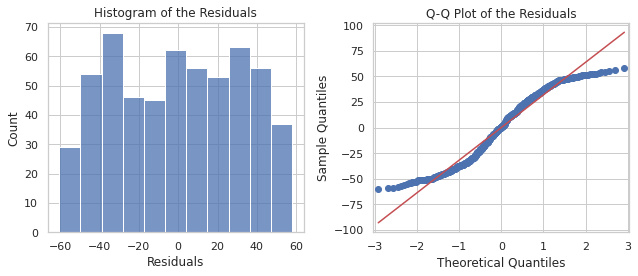

In [41]:
# Calculate the residuals.

residuals = model.resid 

fig, axes = plt.subplots(1,2,figsize=(9,4))
# Create a histogram with the residuals. 

sns.histplot(residuals, ax=axes[0]) 
axes[0].set(title='Histogram of the Residuals', xlabel = 'Residuals')

# Create a QQ plot of the residuals.

sm.qqplot(residuals, line='s', ax=axes[1]) 
axes[1].set(title='Q-Q Plot of the Residuals')

plt.tight_layout()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the QQ-plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?

Based on the histogram and Q-Q plot analysis, it is evident that the normality assumption is not met when using `TV` as the independent variable to predict `Sales`. 

The histogram shows a multimodal distribution with three distinct peaks, indicating that the data is not following a normal distribution. Moreover, the Q-Q plot demonstrates an 'S'-shaped deviation from the red diagonal line, which further confirms the departure from normality.

#### Constant Variance (Homoscedasticity) Assumption

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

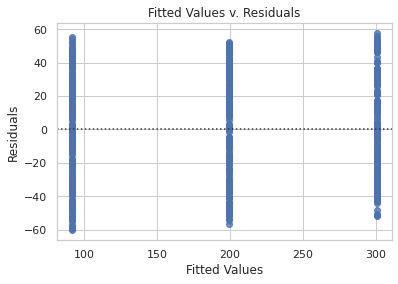

In [49]:
# Create a scatter plot with the fitted values from the model and the residuals.

fitted_values = model.fittedvalues

sns.residplot(x=fitted_values, y=residuals).set(title = "Fitted Values v. Residuals", 
                                                xlabel = "Fitted Values", 
                                                ylabel = "Residuals");

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

# No need because I use residplot instead of scatterplot

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from the fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance (homoscedasticity) assumption met?

The variance where there are fitted values is similarly distributed, validating that the constant variance assumption is met.

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [51]:
# Display the model results summary.

results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):          8.81e-256
Time:                        18:04:45   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?

**Answer:**

The model's $R^2$, which is 0.874, represents the proportion of the variance in the dependent variable `Sales` that can be explained by the independent variable (`TV` in this case). In other words, approximately 87.4% of the variance in sales is explained by the TV budget.

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

**Answer:** 

The default `TV` category for the model is `High`, because there are only coefficients for the other two `TV` categories, `Medium` and `Low`. 

According to the model, `Sales` with a `Medium` or `Low` `TV` category are lower on average than `Sales` with a `High` `TV` category. 
- A`Low` `TV` promotion would be 209.8691 (in millions of dollars) lower in `Sales` on average than a `High` `TV` promotion
- A `Medium` `TV` promotion would be 209.8691 (in millions of dollars) lower in `Sales` on average than a `High` `TV` promotion

The p-value for all coefficients is $0.000$, meaning all coefficients are statistically significant at $p=0.05$. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. 
- There is a $95\%$ chance the interval $[-215.353,-202.274]$ contains the true parameter of the slope of $\beta_{TV \space Low}$, which is the estimated difference in promotion sales if a `Low` `TV` promotion is chosen instead of a `High` `TV` promotion.
- There is a $95\%$ chance the interval $[-108.038,-94.975]$ contains the true parameter of the slope of $\beta_{TV \space Medium}$, which is the estimated difference in promotion sales if a `Medium` `TV` promotion is chosen instead of a `High` `TV` promotion.

**Question:** Do you think your model could be improved? Why or why not? How?

**Answer:** 

Yes we can add more independent variable into the model for more correct prediction. Variables such as the `Location` of the marketing campaign or the `Time` of year it happens, may increase model accuracy.

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [54]:
# Create an one-way ANOVA table for the fit model.

sm.stats.anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(TV),2.0,4.052692e+06,2.026346e+06,1971.455737,8.805550e-256
Residual,566.0,5.817589e+05,1.027843e+03,NaN,NaN


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a one-way ANOVA test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in `statsmodels.api` (i.e. `sm`) that peforms an ANOVA test for a fit linear model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `anova_lm()` function from `sm.stats`. Specify the type of ANOVA test (for example, one-way or two-way), using the `typ` parameter.
   

</details>

**Question:** What are the null and alternative hypotheses for the ANOVA test?

- $H_0$: There is no difference in `Sales` based on the `TV` promotion budget.

- $H_1$: There is a difference in `Sales` based on the `TV` promotion budget.

**Question:** What is your conclusion from the one-way ANOVA test?

Based on the ANOVA test, the F-test statistic value is 1917.75 and the p-value is $8.805 \times 10^{-256}$ (nearly zero), which is less than the significant level of 0.05.

Therefore, we can reject the null hypothesis that there is no difference in `Sales` based on the `TV` promotion budget.

**Question:** What did the ANOVA test tell you?

The results of the one-way ANOVA test indicate that we can reject the null hypothesis in favor of the alternative hypothesis. There is a statistically significant difference in `Sales` among `TV` groups.

### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [56]:
# Perform the Tukey's HSD post hoc test.

tukey_oneway = pairwise_tukeyhsd(endog=data['Sales'], groups=data['TV'])

tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.001,-216.637,-200.9896,True
High,Medium,-101.5061,0.001,-109.3204,-93.6918,True
Low,Medium,107.3072,0.001,99.7063,114.908,True


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a Tukey's HSD post hoc test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pairwise_tukeyhsd()` function from `statsmodels.stats.multicomp`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `endog` argument in `pairwise_tukeyhsd` indicates which variable is being compared across groups (i.e., `Sales`). The `groups` argument in `pairwise_tukeyhsd` tells the function which variable holds the group you’re interested in reviewing.

</details>

**Question:** What is your interpretation of the Tukey HSD test?

The results of the Tukey HSD test show that there is a significant difference in `Sales` between the `High`, `Medium`, and `Low` `TV` promotion budgets. The `High` `TV` promotion budget has the highest sales, followed by the `Medium` `TV` promotion budget, and the `Low` `TV` promotion budget.

The p-values for all three comparisons are less than 0.05, which means that we can reject the null hypothesis and conclude that there is a significant difference in `Sales` between the `TV` groups. The confidence intervals for all three comparisons also do not contain 0, which further supports the conclusion that there is a significant difference in sales between the groups.

In other words, we can be 95% confident that the true difference in sales between the High and Low TV promotion budgets is -208.8133, between the High and Medium TV promotion budgets is -101.5061, and between the Low and Medium TV promotion budgets is 107.3072.

**Question:** What did the post hoc tell you?**

A post hoc test was conducted to determine which `TV` groups are different and how many are different from each other. This provides more detail than the one-way ANOVA results, which can at most determine that at least one group is different. Further, using the Tukey HSD controls for the increasing probability of incorrectly rejecting a null hypothesis from peforming multiple tests. 

Therefore, we can conclude that the Tukey HSD test confirms the results of the ANOVA test and that there is a significant difference in sales between the High, Medium, and Low TV promotion budgets

## **Considerations**

**What are some key takeaways that you learned during this lab?**

* Box-plots are a helpful tool for visualizing the distribution of a variable across groups.
* One-way ANOVA can be used to determine if there are significant differences among the means of three or more groups.
* ANOVA post hoc tests provide a more detailed view of the pairwise differences between groups.

**What summary would you provide to stakeholders? Consider the statistical significance of key relationships and differences in distribution.**

High TV promotion budgets result in significantly more sales than both medium and low TV promotion budgets. Medium TV promotion budgets result in significantly more sales than low TV promotion budgets.


Specifically, following are estimates for the average difference between each pair of TV promotions:

* Estimated average difference between High and Low TV promotions: \\$209.87 million (with 95% confidence that the exact value for this average difference is between 201.89 and 217.84 million dollars).
* Estimated average difference between High and Medium TV promotions: \\$105.50 million (with 95% confidence that the exact value for this average difference is between 97.56 and 113.43 million dollars).
* Estimated average difference between Medium and Low TV promotions: \\$104.37 million (with 95\% confidence that the exact value for this average difference is between 96.83 and 111.92 million dollars).

The linear regression model estimating `Sales` from `TV` had an R-squared of $0.871, making it a fairly accurate estimator. The model showed a statistically significant relationship between the `TV` promotion budget and `Sales`. The model estimated the following relationships:

* Using a high TV promotion budget instead of a medium TV promotion budget increased sales by 105.4952 million dollars (95% CI - 98.859, 112.131 million dollars).

* Using a high TV promotion budget instead of a low TV promotion budget increased sales by 209.8691 million dollars (95% CI - 203.203 million, 216.535 million dollars).

The results of the one-way ANOVA test indicate that the null hypothesis that there is no difference in Sales based on the TV promotion budget can be rejected. Through the ANOVA post hoc test, a significant difference between all pairs of TV promotions was found.

The difference in the distribution of sales across TV promotions was determined significant by both a one-way ANOVA test and a Tukey’s HSD test. 

#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.